In [1]:
import pandas as pd
import numpy as np
import pyrebase
import sklearn
import re
import urllib.request
import requests
import math
from bs4 import BeautifulSoup
from datetime import datetime
from textblob import TextBlob, Word

In [2]:
#Extracts the query from the Google URL
def getQueryFromURL(googleurl):
    startIndex = googleurl.find('=')
    endIndex = googleurl.find('&')
    if endIndex==-1:
        return re.sub("\+", " ", googleurl[startIndex+1:])
    else:
        return re.sub("\+", " ", googleurl[startIndex+1: endIndex])
    
    
def get_query_autocomplete(googleurl):
    startIndex = googleurl.find('=')
    endIndex = googleurl.find('&')
    queryString = googleurl[startIndex+1: endIndex] if endIndex!=-1 else googleurl[startIndex+1:]
    target_url = 'https://www.google.com/complete/search?q=' + queryString+'+&pq='+queryString+'&client=chrome'
    ##Naive, assuming search query has no brackets
    autocompletesuggestions=''
    for line in urllib.request.urlopen(target_url):
        googleautosugg=line.decode('utf-8')
        startBracket = googleautosugg.index('[', 1)
        endBracket = googleautosugg.index(']', 1)
        autocompletesuggestions = googleautosugg[startBracket+1: endBracket]
    autocompletesuggestions.replace('"', "" )
    return autocompletesuggestions.split(',')

def create_url_from_text(queryUrlString):
    url = 'https://www.google.com/search?q=' +queryUrlString
    return url

def get_site_article(beautifulSoupObj):
    texts = set()
    for link in beautifulSoupObj.find_all('p'):
        texts.add(link.get_text())
    return texts

def scrape_website(url):
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser")
    return soup

def setToString(set):
    return '; '.join(set)

def getNParticle(websitedom):
    paragraphs = get_site_article(websitedom)
    paragraphString = setToString(paragraphs)
    blob = TextBlob(paragraphString)
    phrases = cleanPhrases(blob.noun_phrases)
    frequency = {}
    # iterating over the list
    for item in phrases:
        # checking the element in dictionary
        if item == '':
            continue
        if item in frequency:
            # incrementing the count
            frequency[item] += 1
        else:
            # initializing the count
            frequency[item] = 1
    return dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))

def cleanPhrases(phrases):
#     for count, phrase in enumerate(phrases):
#         phrases[count] = Word(re.sub("[^a-zA-Z ]+", "", phrase).strip())
    return phrases

client_id = "3074457360917723621"
pilotBoards=['o9J_l0_9Oa8=', #AH
             'o9J_l1daiMk=',#GH
             'o9J_l1PIrDQ=', #KL
             'o9J_l2KryjI=', #SZ
             'o9J_l3LlFIA=',
             'o9J_l350Img=',
             'o9J_lzKK_yc=',
            ]

In [3]:
boardInfo=pd.read_csv('boardInfo.csv')
boardInfo=boardInfo.set_index('boardId')
boardInfo=boardInfo.drop(['o9J_lyYiALg=','o9J_lwrV0Y8=', 'o9J_lwrV0RU=', 'o9J_lwrV0c8='])
sidebarBoards=boardInfo[boardInfo['studyType']=='Sidebar']
onboardBoards=boardInfo[boardInfo['studyType']=='On Board']
sidebarBoards

,studyType,topicTask
boardId,,
o9J_lwMyp0I=,Sidebar,COVID-19
o9J_lwT45UE=,Sidebar,COVID-19
o9J_lwTEkh4=,Sidebar,COVID-19
o9J_lwTEnZk=,Sidebar,COVID-19
o9J_lwTHmNo=,Sidebar,COVID-19
o9J_lwTHmtQ=,Sidebar,Space Travel
o9J_lwhnitY=,Sidebar,COVID-19
o9J_lwtLWiA=,Sidebar,Space Travel
o9J_lxP9EsE=,Sidebar,Space Travel


In [4]:
suggestionCircleClicked_dict=pd.read_csv('suggCircClicked.csv')
suggestionCircleClicked_dict

,o9J_l3LlFIA=,o9J_lwT0kWk=,o9J_lwT45Gc=,o9J_lwTEnSI=,o9J_lwhnitY=,o9J_lwi6_1c=,o9J_lwj9wsM=,o9J_lwt44k0=,o9J_lwtLWq0=,o9J_lwtLZY8=,o9J_lx2--OQ=,o9J_lxPFjOs=,o9J_lxTWUZI=,o9J_ly0SnuI=,o9J_lyGIeLY=,o9J_lyYiALM=,o9J_lzKK_yc=,o9J_lzYurAk=
0,2021-09-06T05:32:37.811671,2021-09-17T19:54:25.164725,2021-09-19T18:57:56.388663,2021-09-20T22:12:49.301259,2021-09-14T22:22:28.479815,2021-09-14T21:10:37.663938,2021-09-14T19:51:08.671656,2021-09-15T17:10:05.041323,2021-09-16T16:10:37.446423,2021-09-15T19:46:40.357202,2021-09-13T19:21:07.409868,2021-09-13T22:35:24.822507,2021-09-14T18:35:59.152866,2021-09-06T21:31:53.929005,2021-09-07T19:38:13.633187,2021-09-13T16:45:39.070851,2021-09-01T16:15:02.298860,2021-09-03T19:02:11.951766
1,2021-09-06T05:32:53.289714,2021-09-17T20:24:03.868339,2021-09-19T18:58:05.109626,2021-09-20T22:12:57.055382,2021-09-14T22:22:51.576317,2021-09-14T21:14:37.140873,2021-09-14T19:59:51.049156,2021-09-15T17:11:52.661861,2021-09-16T16:10:49.977227,2021-09-15T19:54:09.495736,2021-09-13T19:21:19.728851,2021-09-13T22:35:45.090042,2021-09-14T18:55:31.076087,2021-09-06T21:32:19.249166,2021-09-07T19:45:24.133647,2021-09-13T16:46:28.735344,2021-09-01T16:18:48.059334,2021-09-03T19:03:04.606178
2,2021-09-06T05:45:20.063838,2021-09-17T20:24:09.883425,2021-09-19T18:58:13.697926,2021-09-20T22:13:10.726345,NaN,2021-09-14T21:26:43.434214,2021-09-14T20:08:31.733553,2021-09-15T17:27:17.324729,2021-09-16T16:11:01.348810,2021-09-15T19:47:23.174137,2021-09-13T19:27:02.696450,2021-09-13T22:36:29.374655,2021-09-14T18:37:48.505887,2021-09-06T21:32:30.409512,2021-09-07T20:12:27.818038,2021-09-13T17:04:35.732466,2021-09-01T16:14:49.810638,2021-09-03T19:32:29.347889
3,2021-09-06T05:45:47.781514,2021-09-17T19:46:03.675895,2021-09-19T19:04:05.851793,2021-09-20T22:13:14.957240,NaN,2021-09-14T21:36:10.566694,2021-09-14T20:09:20.740790,2021-09-15T17:12:05.443086,2021-09-16T16:18:12.880288,2021-09-15T19:47:30.035405,2021-09-13T19:20:57.434521,2021-09-13T22:37:34.105670,2021-09-14T18:42:10.650677,2021-09-06T21:14:50.437901,2021-09-07T20:07:28.554210,2021-09-13T16:27:28.073845,2021-09-01T16:18:06.839022,2021-09-03T19:32:36.149804
4,2021-09-06T05:46:06.487105,2021-09-17T19:47:02.390048,2021-09-19T19:17:39.367505,2021-09-20T22:46:23.228461,NaN,2021-09-14T20:57:58.304965,2021-09-14T20:10:03.573273,2021-09-15T17:27:14.038253,2021-09-16T16:18:33.527968,2021-09-15T19:48:23.495304,2021-09-13T19:32:56.911230,2021-09-13T22:39:31.234650,2021-09-14T18:48:03.328277,2021-09-06T21:23:42.289638,NaN,2021-09-13T17:04:22.297555,2021-09-01T16:14:44.474984,2021-09-03T19:32:52.167853
5,2021-09-06T05:46:23.973338,2021-09-17T19:54:05.186198,2021-09-19T19:19:59.844428,2021-09-20T22:19:26.994694,NaN,2021-09-14T20:58:49.335275,2021-09-14T20:13:59.354200,2021-09-15T17:12:28.174788,2021-09-16T16:18:58.067952,2021-09-15T19:48:31.483914,2021-09-13T19:28:44.886968,2021-09-13T22:44:52.890950,2021-09-14T18:50:01.322500,2021-09-06T21:31:44.780422,NaN,2021-09-13T16:27:35.530981,2021-09-01T16:19:32.882949,2021-09-03T19:01:49.283553
6,2021-09-06T05:53:51.586293,2021-09-17T19:55:12.979441,2021-09-19T19:21:03.811360,2021-09-20T22:24:15.166825,NaN,2021-09-14T21:55:26.131068,2021-09-14T20:14:07.266013,2021-09-15T16:39:29.015205,2021-09-16T16:19:32.308172,2021-09-15T19:48:45.055618,2021-09-13T19:39:10.048837,2021-09-13T22:48:37.139085,2021-09-14T18:50:06.737993,2021-09-06T21:38:53.647301,NaN,2021-09-13T17:04:25.127694,2021-09-01T16:30:42.972385,2021-09-03T19:03:00.427436
7,2021-09-06T06:02:28.262458,2021-09-17T19:57:33.060033,2021-09-19T19:22:08.483866,2021-09-20T22:24:06.285650,NaN,2021-09-14T20:59:08.598759,2021-09-14T19:46:02.641637,2021-09-15T16:39:41.710097,2021-09-16T16:32:17.047888,2021-09-15T19:53:55.809806,2021-09-13T19:44:11.022092,2021-09-13T23:02:44.760798,2021-09-14T18:50:09.671055,2021-09-06T21:38:50.184688,NaN,2021-09-13T16:41:39.184054,NaN,2021-09-03T19:03:02.449269
8,2021-09-06T05:32:43.720458,2021-09-17T19:57:48.647839,2021-09-19T19:22:17.638948,2021-09-20T22:24:01.808845,NaN,

In [5]:
sidebarOpened_dict=pd.read_csv('sidebarOpened.csv')
sidebarOpened_dict['timestamp']= pd.to_datetime(sidebarOpened_dict['timestamp'])
sidebarOpened_dict

,boardId,timestamp
0,o9J_l0_9Oa8=,2021-09-01 16:08:38.225391
1,o9J_l2KryjI=,2021-09-13 21:16:16.841710
2,o9J_l350Img=,2021-08-30 21:35:27.007326
3,o9J_l3LlFIA=,2021-09-06 06:17:10.732652
4,o9J_lwMyp0I=,2021-09-17 17:09:10.708716
5,o9J_lwT45UE=,2021-09-20 19:15:29.313973
6,o9J_lwTEkh4=,2021-09-21 04:08:02.590026
7,o9J_lwTEnZk=,2021-09-21 03:14:14.089902
8,o9J_lwTHmNo=,2021-09-20 20:59:00.832071
9,o9J_lwTHmtQ=,2021-09-20 20:13:43.982192


In [54]:
browser_df_joined =pd.read_csv('browser_df.csv')
browser_df_joined['timestamp']= pd.to_datetime(browser_df_joined['timestamp'])
browser_df_joined

,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask
0,o9J_lwMyp0I=,2021-09-17 16:28:47.910522,environmental impact of covid 19,"['""environmental impact of covid 19 pandemic""'...",['What are some long term effects of COVID-19?...,['positive and negative impact of covid-19 on ...,15,0,Sidebar,COVID-19
1,o9J_lwMyp0I=,2021-09-17 16:56:27.546971,Environmental racism Environmental Impacts of ...,[''],NaN,"['Environmental racism policies', 'Environment...",2,1,Sidebar,COVID-19
2,o9J_lwMyp0I=,2021-09-17 16:58:17.872410,Post-covid Green Recovery Environmental Impact...,[''],['How has the COVID-19 pandemic impacted the e...,"['Post COVID green recovery plan', 'What does ...",1,1,Sidebar,COVID-19
3,o9J_lwMyp0I=,2021-09-17 16:59:31.474193,Waste management policies Environmental Impact...,[''],['How has the COVID-19 pandemic impacted the e...,['impact of covid-19 on solid waste management...,2,1,Sidebar,COVID-19
4,o9J_lwMyp0I=,2021-09-17 17:03:15.252394,Vaccine transportation Environmental Impacts o...,[''],['How has the COVID-19 pandemic impacted the e...,"['environmental impact of covid-19 2021', 'Env...",1,1,Sidebar,COVID-19
...,...,...,...,...,...,...,...,...,...,...
527,o9J_lzYurAk=,2021-09-03 18:58:24.475979,Recycling Programs covid 19,[''],NaN,"['Recycling during COVID', 'Cardboard recyclin...",1,0,On Board,COVID-19
528,o9J_lzYurAk=,2021-09-03 19:00:39.513688,covid 19 and waste,"['""covid 19 and waste management""', '""covid 19...",['How has the COVID-19 pandemic impacted the e...,"['Role of plastic during COVID-19', 'COVID-19 ...",0,0,On Board,COVID-19
529,o9J_lzYurAk=,2021-09-03 19:00:42.203490,covid 19 and waste,"['""covid 19 and waste management""', '""covid 19...",NaN,NaN,0,0,On Board,COVID-19
530,o9J_lzYurAk=,2021-09-03 19:00:55.377616,covid 19 and waste,"['""covid 19 and waste management""', '""covid 19...",NaN,NaN,0,0,On Board,COVID-19


In [8]:
suggestion_df_joined = pd.read_csv('suggestion_df.csv', dtype={'parentIdB': str, 'parentIdA':str})
suggestion_df_joined['timestamp']= pd.to_datetime(suggestion_df_joined['timestamp'])
suggestion_df_joined['lastUpdated']= pd.to_datetime(suggestion_df_joined['lastUpdated'])
suggestion_df_joined['parentIdB']=suggestion_df_joined['parentIdB'].fillna(0.0).astype('int64')
suggestion_df_joined['parentIdA']=suggestion_df_joined['parentIdA'].astype('string')
suggestion_df_joined['parentIdB']=suggestion_df_joined['parentIdB'].astype('string')
suggestion_df_joined[suggestion_df_joined['parentIdB']=='3074457363898360634']

,boardId,suggId,timestamp,suggestionText,type,status,lastUpdated,parentIdA,parentIdB,grouping,studyType,topicTask,opened,suggestionsQueried
404,o9J_lxPFjOs=,-MjWKIFVDuBSNHsYkD9f,2021-09-13 22:44:22.650927,Artemis Program,Cross-Pollination,4,2021-09-13 23:06:07.085770,3074457363898295532,3074457363898360634,Line,On Board,Space Travel,1,1
407,o9J_lxPFjOs=,-MjWLt3-LYvtZZ7_2bbR,2021-09-13 22:51:19.632923,International Maritime Satellite Organization,Cross-Pollination,2,2021-09-13 23:06:07.092567,3074457363898295532,3074457363898360634,Line,On Board,Space Travel,0,0
408,o9J_lxPFjOs=,-MjWLt6kYXee836dUZFb,2021-09-13 22:51:19.632923,International Telecommunications Union,Cross-Pollination,4,2021-09-13 23:07:12.769893,3074457363898295532,3074457363898360634,Line,On Board,Space Travel,1,1
409,o9J_lxPFjOs=,-MjWLtCeOy4VjnSBhGrr,2021-09-13 22:51:19.632923,Outer Space Treaty,Cross-Pollination,4,2021-09-13 23:06:07.078560,3074457363898295532,3074457363898360634,Line,On Board,Space Travel,1,1
413,o9J_lxPFjOs=,-MjWNRcJCMqh7HTAtoeZ,2021-09-13 22:58:07.465385,The Wolf Amendment,Cross-Pollination,4,2021-09-13 23:06:31.687623,3074457363898295532,3074457363898360634,Line,On Board,Space Travel,1,1
415,o9J_lxPFjOs=,-MjWO5SDsrj0ZyuZwEo3,2021-09-13 23:00:58.787660,U.S Space Launch Competitiveness Act,Cross-Pollination,2,2021-09-13 23:06:07.094696,3074457363898295532,3074457363898360634,Line,On Board,Space Travel,0,0


## Aggregation calculations

In [9]:
suggestions_textcnt=suggestion_df_joined[['boardId', 'suggestionText']].groupby(['boardId']).count().rename(columns={"suggestionText": "suggestionsOffered"})
suggestions_opened=suggestion_df_joined[['boardId', 'opened']].groupby(['boardId'])['opened'].sum()
suggestions_suggestionText=suggestion_df_joined[['boardId', 'suggestionsQueried']].groupby(['boardId'])['suggestionsQueried'].sum()
suggestions_agg=suggestions_textcnt.join(suggestions_opened, how='inner')
suggestions_agg=suggestions_agg.join(suggestions_suggestionText, how='inner')
suggestions_agg=suggestions_agg.join(boardInfo, how='inner')
suggestions_agg

,suggestionsOffered,opened,suggestionsQueried,studyType,topicTask
boardId,,,,,
o9J_lwMyp0I=,26,26,5,Sidebar,COVID-19
o9J_lwT0kWk=,22,5,5,On Board,Space Travel
o9J_lwT45Gc=,16,14,14,On Board,COVID-19
o9J_lwT45UE=,12,12,3,Sidebar,COVID-19
o9J_lwTEkh4=,11,5,5,Sidebar,COVID-19
o9J_lwTEnSI=,21,13,13,On Board,Space Travel
o9J_lwTEnZk=,20,15,5,Sidebar,COVID-19
o9J_lwTHmNo=,15,8,8,Sidebar,COVID-19
o9J_lwTHmtQ=,14,12,2,Sidebar,Space Travel


In [10]:
browser_df_MiroSuggestions = browser_df_joined[browser_df_joined['clickedFromMiro']==1]
browser_MiroQuery = browser_df_MiroSuggestions[['boardId', 'query']].groupby(['boardId']).nunique().rename(columns={'query': 'UniqueMiroQueriesIssued'})
browser_allQuery = browser_df_joined[['boardId', 'query']].groupby(['boardId']).nunique().rename(columns={'query': 'UniqueQueriesIssued'})
browser_webpages = browser_df_joined[['boardId', 'webpagesVisited']].groupby(['boardId'])['webpagesVisited'].sum()
browser_cnt = browser_df_joined[['boardId','timestamp']].groupby(['boardId']).count().rename(columns={'timestamp': 'queriesIssued'})
browser_agg=browser_cnt.join(browser_allQuery, how='inner')
browser_agg=browser_agg.join(browser_MiroQuery, how='inner')
browser_agg=browser_agg.join(browser_webpages, how='inner')
browser_agg=browser_agg.join(boardInfo, how='inner')
browser_agg

,queriesIssued,UniqueQueriesIssued,UniqueMiroQueriesIssued,webpagesVisited,studyType,topicTask
boardId,,,,,,
o9J_lwMyp0I=,6,6,5,22,Sidebar,COVID-19
o9J_lwT0kWk=,6,6,4,8,On Board,Space Travel
o9J_lwT45Gc=,24,18,14,25,On Board,COVID-19
o9J_lwT45UE=,8,6,3,12,Sidebar,COVID-19
o9J_lwTEkh4=,5,5,5,5,Sidebar,COVID-19
o9J_lwTEnSI=,23,18,13,34,On Board,Space Travel
o9J_lwTEnZk=,5,5,4,16,Sidebar,COVID-19
o9J_lwTHmNo=,11,10,8,6,Sidebar,COVID-19
o9J_lwTHmtQ=,4,4,3,14,Sidebar,Space Travel


### Percentage of suggestions queried by board

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from matplotlib import collections as mc
from datetime import timedelta
from scipy import stats

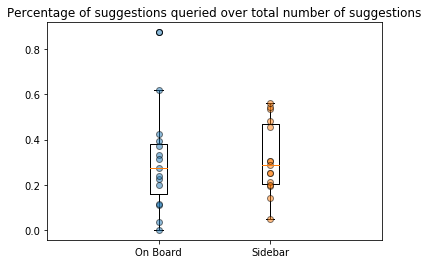

In [12]:
suggestion_df_joined=suggestion_df_joined.astype({'opened': 'float64', 'suggestionsQueried': 'float64'})
suggestions_textcnt=suggestion_df_joined[['boardId', 'suggestionText']].groupby(['boardId']).count().rename(columns={"suggestionText": "suggestionsOffered"})
suggestionsQueried_onboard=suggestion_df_joined[suggestion_df_joined['studyType']=='On Board'].pivot_table(index=['studyType','boardId'], aggfunc='sum')
suggestionsQueried_onboard=suggestions_textcnt.join(suggestionsQueried_onboard, how='inner')
suggestionsQueried_sidebar=suggestion_df_joined[suggestion_df_joined['studyType']=='Sidebar'].pivot_table(index=['studyType','boardId'], aggfunc='sum')
suggestionsQueried_sidebar=suggestions_textcnt.join(suggestionsQueried_sidebar, how='inner')
f, ax = plt.subplots()
ax.boxplot(suggestionsQueried_onboard['suggestionsQueried']/suggestionsQueried_onboard['suggestionsOffered'],positions=[1])
ax.boxplot(suggestionsQueried_sidebar['suggestionsQueried']/suggestionsQueried_sidebar['suggestionsOffered'],positions=[2])
ax.plot([1 for x in range(len(suggestionsQueried_onboard['suggestionsQueried']))], suggestionsQueried_onboard['suggestionsQueried']/suggestionsQueried_onboard['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2 for x in range(len(suggestionsQueried_sidebar['suggestionsQueried']))], suggestionsQueried_sidebar['suggestionsQueried']/suggestionsQueried_sidebar['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Percentage of suggestions queried over total number of suggestions')
plt.xlim([0, 3])
ax.set_xticks([1, 2])
ax.set_xticklabels(['On Board', 'Sidebar'])
plt.savefig(r'C://Users/sheld/ReimaginedSearch/visualizations/suggestionsQueried.png')

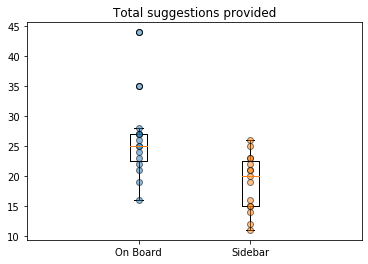

In [13]:
f, ax = plt.subplots()
ax.boxplot(suggestionsQueried_onboard['suggestionsOffered'],positions=[1])
ax.boxplot(suggestionsQueried_sidebar['suggestionsOffered'],positions=[2])
ax.plot([1 for x in range(len(suggestionsQueried_onboard['suggestionsOffered']))], suggestionsQueried_onboard['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2 for x in range(len(suggestionsQueried_sidebar['suggestionsOffered']))], suggestionsQueried_sidebar['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Total suggestions provided')
plt.xlim([0, 3])
ax.set_xticks([1, 2])
ax.set_xticklabels(['On Board', 'Sidebar'])
plt.show()
#suggestionsQueried_onboard

#### Testing for normality

In [14]:
suggProp_Sidebar=suggestionsQueried_sidebar['suggestionsOffered']/suggestionsQueried_sidebar['suggestionsOffered']
suggProp_Onboard=suggestionsQueried_onboard['suggestionsQueried']/suggestionsQueried_onboard['suggestionsOffered']
print("Sample size:")
print("On Board: " + str(len(suggestionsQueried_onboard['suggestionsQueried'].dropna())))
print("Sidebar: " + str(len(suggestionsQueried_sidebar['suggestionsQueried'].dropna())))
print('Means:')
print('On Board: ' +str(suggProp_Onboard.mean()) )
print('Sidebar: ' +str(suggProp_Sidebar.mean()) )
print('Variance:')
print('On Board: ' +str(suggestionsQueried_onboard['suggestionsQueried'].var()) )
print('Sidebar: ' +str(suggestionsQueried_sidebar['suggestionsQueried'].var()) )
print(stats.shapiro(suggestionsQueried_onboard['suggestionsQueried'].dropna()))
print(stats.shapiro(suggestionsQueried_sidebar['suggestionsQueried'].dropna()))


Sample size:
On Board: 15
Sidebar: 15
Means:
On Board: 0.3021272483202308
Sidebar: 1.0
Variance:
On Board: 19.352380952380948
Sidebar: 10.923809523809524
ShapiroResult(statistic=0.9540132880210876, pvalue=0.5897138714790344)
ShapiroResult(statistic=0.9468142986297607, pvalue=0.47574669122695923)


#### Testing for Homoschedasticity


In [15]:
print(stats.bartlett(suggestionsQueried_onboard['suggestionsQueried'].dropna(), suggestionsQueried_sidebar['suggestionsQueried'].dropna()))
print(stats.levene(suggestionsQueried_onboard['suggestionsQueried'].dropna(), suggestionsQueried_sidebar['suggestionsQueried'].dropna()))

BartlettResult(statistic=1.0904174093309333, pvalue=0.29637874297087663)
LeveneResult(statistic=1.654129190515127, pvalue=0.2089319280581436)


#### Using Contingency table 

In [16]:
contingencytable = np.array([[suggestionsQueried_onboard['suggestionsQueried'].sum(), suggestionsQueried_sidebar['suggestionsQueried'].sum()],
                   [suggestionsQueried_onboard['suggestionsOffered'].sum(), suggestionsQueried_sidebar['suggestionsOffered'].sum()]])

pvalue=stats.chi2_contingency(contingencytable)[1]
pvalue

0.5304650790234567

### Percentage of queries issued from Miro over total number of queries

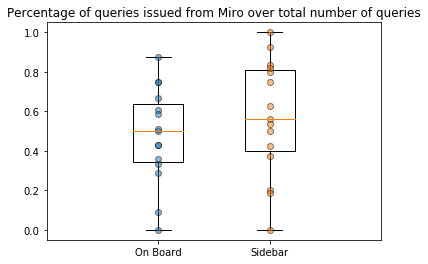

In [21]:
browser_df_joined['time_diff'] = browser_df_joined.groupby(['boardId'])['timestamp'].diff()
browser_pivottable=browser_df_joined.pivot_table(index=['boardId'],columns='studyType')
browser_pivottable_sum=browser_df_joined.pivot_table(index=['boardId'],columns='studyType', aggfunc='sum')
browser_pivottable_count=browser_df_joined[['clickedFromMiro', 'webpagesVisited', 'boardId', 'studyType']].pivot_table(index=['boardId'],columns='studyType', aggfunc='count')
browser_percentage = browser_pivottable_sum/browser_pivottable_count
queries_notfrommiro =browser_pivottable_count-browser_pivottable_sum
f, ax = plt.subplots()
ax.boxplot(browser_percentage['clickedFromMiro']['On Board'].dropna(),positions=[1/3])
ax.boxplot(browser_percentage['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3 for x in range(len(browser_percentage['clickedFromMiro']['On Board']))], browser_percentage['clickedFromMiro']['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_percentage['clickedFromMiro']['Sidebar']))], browser_percentage['clickedFromMiro']['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Percentage of queries issued from Miro over total number of queries')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
plt.savefig(r'C://Users/sheld/ReimaginedSearch/visualizations/MiroQueries.png')

[Text(0, 0, 'On Board'), Text(0, 0, 'Sidebar')]

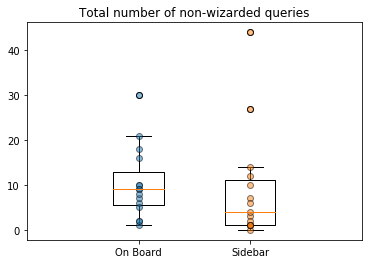

In [18]:
f, ax = plt.subplots()
ax.boxplot(queries_notfrommiro['clickedFromMiro']['On Board'].dropna(),positions=[1/3])
ax.boxplot(queries_notfrommiro['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3 for x in range(len(queries_notfrommiro['clickedFromMiro']['On Board']))], queries_notfrommiro['clickedFromMiro']['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(queries_notfrommiro['clickedFromMiro']['Sidebar']))], queries_notfrommiro['clickedFromMiro']['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Total number of non-wizarded queries')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])

[Text(0, 0, 'On Board'), Text(0, 0, 'Sidebar')]

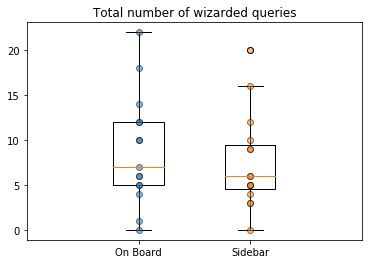

In [19]:
f, ax = plt.subplots()
ax.boxplot(browser_pivottable_sum['clickedFromMiro']['On Board'].dropna(),positions=[1/3])
ax.boxplot(browser_pivottable_sum['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3 for x in range(len(browser_pivottable_sum['clickedFromMiro']['On Board']))], browser_pivottable_sum['clickedFromMiro']['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_pivottable_sum['clickedFromMiro']['Sidebar']))], browser_pivottable_sum['clickedFromMiro']['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Total number of wizarded queries')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])

In [22]:
print("Sample size:")
print("On Board: " + str(len(browser_pivottable['clickedFromMiro']['On Board'].dropna())))
print("Sidebar: " + str(len(browser_pivottable['clickedFromMiro']['Sidebar'].dropna())))
print('Means:')
print('On Board: ' +str(browser_pivottable['clickedFromMiro']['On Board'].dropna().mean()) )
print('Sidebar: ' +str(browser_pivottable['clickedFromMiro']['Sidebar'].dropna().mean()) )
print('Variance:')
print('On Board: ' +str(browser_pivottable['clickedFromMiro']['On Board'].dropna().var()) )
print('Sidebar: ' +str(browser_pivottable['clickedFromMiro']['Sidebar'].dropna().var()) )
print(stats.shapiro(browser_pivottable['clickedFromMiro']['On Board'].dropna()))
print(stats.shapiro(browser_pivottable['clickedFromMiro']['Sidebar'].dropna()))

Sample size:
On Board: 15
Sidebar: 15
Means:
On Board: 0.4782978629451597
Sidebar: 0.5687428338669475
Variance:
On Board: 0.05912408704001955
Sidebar: 0.08599160212066882
ShapiroResult(statistic=0.9757230877876282, pvalue=0.9319221377372742)
ShapiroResult(statistic=0.9632309675216675, pvalue=0.7483247518539429)


#### Testing for homoscedascity

In [23]:
print(stats.bartlett(browser_pivottable['clickedFromMiro']['On Board'].dropna(), browser_pivottable['clickedFromMiro']['Sidebar'].dropna()))
print(stats.levene(browser_pivottable['clickedFromMiro']['On Board'].dropna(), browser_pivottable['clickedFromMiro']['Sidebar'].dropna()))

BartlettResult(statistic=0.4714834448955861, pvalue=0.4923055050155236)
LeveneResult(statistic=0.6854950961385156, pvalue=0.414702376578323)


#### Using contingency table

In [24]:
onboardMiroQueries = browser_pivottable_sum['clickedFromMiro']['On Board'].sum()
sidebarMiroQueries = browser_pivottable_sum['clickedFromMiro']['Sidebar'].sum()
totalOnBoardQueries = browser_pivottable_count['clickedFromMiro']['On Board'].sum()
totalSidebarQueries = browser_pivottable_count['clickedFromMiro']['Sidebar'].sum()
contingencytable= [[onboardMiroQueries, sidebarMiroQueries], [totalOnBoardQueries, totalSidebarQueries]]

pvalue=stats.chi2_contingency(contingencytable)[1]
pvalue

0.9627212710915315

### Total Queries Issued

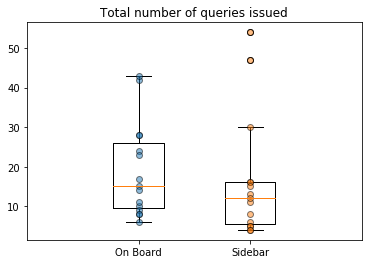

In [25]:
total_queries = browser_df_joined.pivot_table('timestamp', index=['boardId'],columns='studyType', aggfunc=len,dropna=False)
#total_queries_avg = pd.DataFrame([[total_queries['On Board'].mean(), total_queries['Sidebar'].mean()]], columns = ['On Board', 'Sidebar'], index=['Avg'])
#total_queries=total_queries.append(total_queries_avg)
total_queries.style.set_caption('Number of queries')
f, ax = plt.subplots()
ax.boxplot(total_queries['On Board'].dropna(),positions=[1/3])
ax.boxplot(total_queries['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3  for x in range(len(total_queries['On Board']))], total_queries['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(total_queries['Sidebar']))], total_queries['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Total number of queries issued')
plt.savefig(r'C://Users/sheld/ReimaginedSearch/visualizations/totalQueries.png')

In [26]:
print("Sample size:")
print("On Board: " + str(len(total_queries['On Board'].dropna())))
print("Sidebar: " + str(len(total_queries['Sidebar'].dropna())))
print('Means:')
print('On Board: ' +str(total_queries['On Board'].dropna().mean()) )
print('Sidebar: ' +str(total_queries['Sidebar'].dropna().mean()) )
print('Variance:')
print('On Board: ' +str(total_queries['On Board'].dropna().var()) )
print('Sidebar: ' +str(total_queries['Sidebar'].dropna().var()) )
print(stats.shapiro(total_queries['On Board'].dropna()))
print(stats.shapiro(total_queries['Sidebar'].dropna()))

Sample size:
On Board: 15
Sidebar: 15
Means:
On Board: 19.066666666666666
Sidebar: 16.4
Variance:
On Board: 143.49523809523808
Sidebar: 238.82857142857145
ShapiroResult(statistic=0.8755435347557068, pvalue=0.04073118790984154)
ShapiroResult(statistic=0.7575298547744751, pvalue=0.0011019582161679864)


#### Using Mann-Whitney U Test

In [27]:
stats.mannwhitneyu(total_queries['On Board'].dropna(), total_queries['Sidebar'].dropna())

MannwhitneyuResult(statistic=86.5, pvalue=0.14480278639539673)

#### Using two sample t-test

In [28]:
stats.ttest_ind(total_queries['On Board'].dropna(), total_queries['Sidebar'].dropna())

Ttest_indResult(statistic=0.5282003557204225, pvalue=0.6015219628260049)

### Percentage of suggestions queried by type

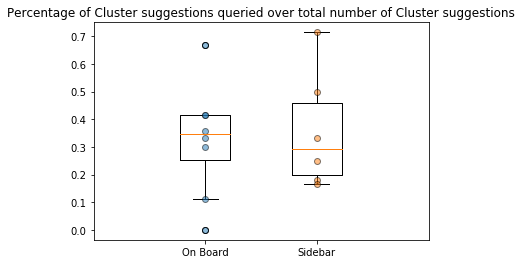

Sample size:
On Board: 8
Sidebar: 6
Means:
On Board: 0.3251984126984127
Sidebar: 0.35768398268398266
Variance:
On Board: 0.040948916603678505
Sidebar: 0.045404766589831516
ShapiroResult(statistic=0.9498643279075623, pvalue=0.7098643183708191)
ShapiroResult(statistic=0.8871282339096069, pvalue=0.30341342091560364)
BartlettResult(statistic=0.01439665779227859, pvalue=0.9044941801277404)
LeveneResult(statistic=0.06304302677962895, pvalue=0.8059972745216759)
Ttest_indResult(statistic=-0.2907349212194113, pvalue=0.7762176652386077)
MannwhitneyuResult(statistic=23.5, pvalue=0.5)


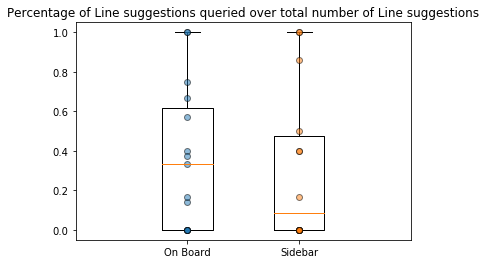

Sample size:
On Board: 15
Sidebar: 14
Means:
On Board: 0.3603968253968254
Sidebar: 0.30884353741496595
Variance:
On Board: 0.13179350232156353
Sidebar: 0.15362238668361117
ShapiroResult(statistic=0.8700500726699829, pvalue=0.03379809856414795)
ShapiroResult(statistic=0.7705335021018982, pvalue=0.0022063516080379486)
BartlettResult(statistic=0.07640408673482041, pvalue=0.7822309561012026)
LeveneResult(statistic=0.014609756623782864, pvalue=0.904688379470257)
Ttest_indResult(statistic=0.3677552762808819, pvalue=0.7159229753996472)
MannwhitneyuResult(statistic=94.0, pvalue=0.31694755021549265)


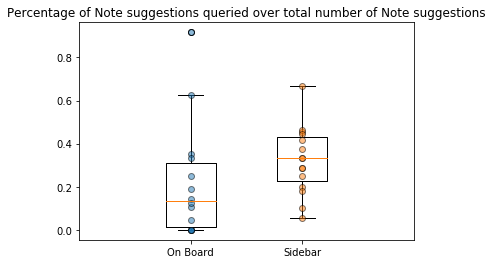

Sample size:
On Board: 14
Sidebar: 15
Means:
On Board: 0.22042362399505258
Sidebar: 0.3229553779553779
Variance:
On Board: 0.07174322327847375
Sidebar: 0.024676421325944418
ShapiroResult(statistic=0.8054688572883606, pvalue=0.0058364300057291985)
ShapiroResult(statistic=0.9760680794715881, pvalue=0.9355641603469849)
BartlettResult(statistic=3.5825637734148583, pvalue=0.05838897235913961)
LeveneResult(statistic=1.0278940303343265, pvalue=0.3196535813356661)
Ttest_indResult(statistic=-1.2681280148406293, pvalue=0.21557858282778974)
MannwhitneyuResult(statistic=59.5, pvalue=0.024543089172219142)


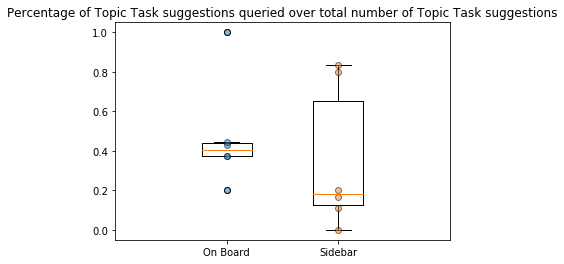

Sample size:
On Board: 6
Sidebar: 6
Means:
On Board: 0.4705026455026455
Sidebar: 0.35185185185185186
Variance:
On Board: 0.07484357940707145
Sidebar: 0.13435390946502057
ShapiroResult(statistic=0.7751861214637756, pvalue=0.03474731370806694)
ShapiroResult(statistic=0.7979158163070679, pvalue=0.05628582462668419)
BartlettResult(statistic=0.3835697031444337, pvalue=0.535698956199126)
LeveneResult(statistic=0.4767086078493478, pvalue=0.5056257160797766)
Ttest_indResult(statistic=0.635430474398752, pvalue=0.5394154433566822)
MannwhitneyuResult(statistic=10.5, pvalue=0.13032906190565646)


In [29]:
suggestiongroups_df_onboard=suggestion_df_joined[suggestion_df_joined['studyType']=='On Board'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='mean')
suggestiongroups_df_sidebar=suggestion_df_joined[suggestion_df_joined['studyType']=='Sidebar'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='mean')
for item in suggestiongroups_df_onboard['opened'].columns:
    f, ax = plt.subplots()
    ax.boxplot(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(),positions=[1/3])
    ax.boxplot(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(),positions=[2/3])
    ax.plot([1/3  for x in range(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))], suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    ax.plot([2/3 for x in range(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))], suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    plt.xlim([0, 1])
    ax.set_xticks([1/3, 2/3])
    ax.set_xticklabels(['On Board', 'Sidebar'])
    ax.set_title('Percentage of ' + item + ' suggestions queried over total number of ' + item + ' suggestions')
    plt.show()
    print("Sample size:")
    print("On Board: " + str(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna())))
    print("Sidebar: " + str(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna())))
    print('Means:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().mean()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().mean()) )
    print('Variance:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().var()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().var()) )
    print(stats.shapiro(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))
    print(stats.shapiro(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.bartlett(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.levene(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.ttest_ind(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
            
    print(stats.mannwhitneyu(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
#     if stats.shapiro(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()).pvalue<0.05 and stats.shapiro(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()).pvalue<0.05:
#             print(stats.levene(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
#             print(stats.ttest_ind(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
#     else:
#         print(stats.mannwhitneyu(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
# print(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna())

### Total numberof suggestions queried by type

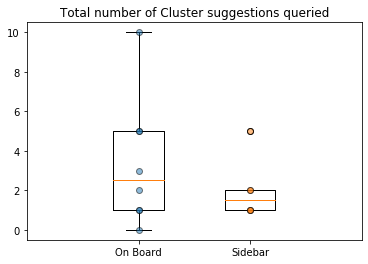

Sample size:
On Board: 8
Sidebar: 6
Means:
On Board: 3.375
Sidebar: 2.0
Variance:
On Board: 10.553571428571429
Sidebar: 2.4
ShapiroResult(statistic=0.8821547031402588, pvalue=0.19745174050331116)
ShapiroResult(statistic=0.7207164764404297, pvalue=0.01014401763677597)
BartlettResult(statistic=2.5248220868085482, pvalue=0.11206741980292649)
LeveneResult(statistic=1.835651074589128, pvalue=0.2004195181753506)
Ttest_indResult(statistic=0.9517361094120719, pvalue=0.36000782604402026)


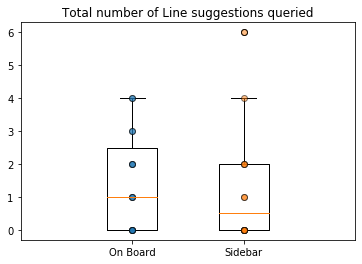

Sample size:
On Board: 15
Sidebar: 14
Means:
On Board: 1.5333333333333334
Sidebar: 1.2857142857142858
Variance:
On Board: 2.1238095238095243
Sidebar: 3.296703296703297
ShapiroResult(statistic=0.8736408948898315, pvalue=0.038174908608198166)
ShapiroResult(statistic=0.7515289187431335, pvalue=0.0013336106203496456)
BartlettResult(statistic=0.6267031395004607, pvalue=0.428567209067234)
LeveneResult(statistic=0.03524420754922234, pvalue=0.8524886181008781)
Ttest_indResult(statistic=0.40638414595897876, pvalue=0.6876635603448678)


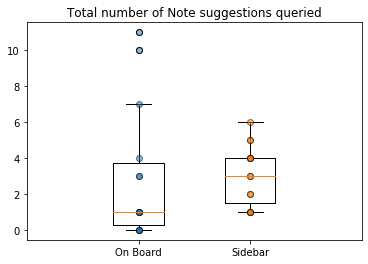

Sample size:
On Board: 14
Sidebar: 15
Means:
On Board: 3.0
Sidebar: 3.066666666666667
Variance:
On Board: 14.0
Sidebar: 2.7809523809523813
ShapiroResult(statistic=0.7819539904594421, pvalue=0.0030113698448985815)
ShapiroResult(statistic=0.9089282155036926, pvalue=0.13038119673728943)
BartlettResult(statistic=7.837006797370436, pvalue=0.005118729429624569)
LeveneResult(statistic=1.7306328406014468, pvalue=0.19939231108567948)
Ttest_indResult(statistic=-0.06271488769815654, pvalue=0.9504555238671208)


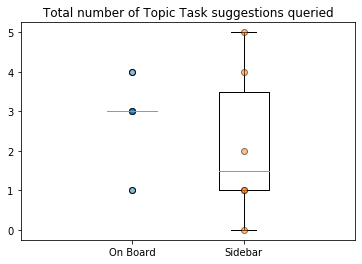

Sample size:
On Board: 6
Sidebar: 6
Means:
On Board: 2.8333333333333335
Sidebar: 2.1666666666666665
Variance:
On Board: 0.9666666666666666
Sidebar: 3.7666666666666666
ShapiroResult(statistic=0.7698016166687012, pvalue=0.030909432098269463)
ShapiroResult(statistic=0.9123750925064087, pvalue=0.4522051513195038)
BartlettResult(statistic=1.9576186608355282, pvalue=0.16176822752589193)
LeveneResult(statistic=2.608695652173913, pvalue=0.13735257071320003)
Ttest_indResult(statistic=0.750586625040802, pvalue=0.47019420700888015)


In [30]:
suggestiongroups_df_onboard=suggestion_df_joined[suggestion_df_joined['studyType']=='On Board'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='sum')
suggestiongroups_df_sidebar=suggestion_df_joined[suggestion_df_joined['studyType']=='Sidebar'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='sum')
for item in suggestiongroups_df_onboard['opened'].columns:
    f, ax = plt.subplots()
    ax.boxplot(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(),positions=[1/3])
    ax.boxplot(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(),positions=[2/3])
    ax.plot([1/3  for x in range(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))], suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    ax.plot([2/3 for x in range(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))], suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    plt.xlim([0, 1])
    ax.set_xticks([1/3, 2/3])
    ax.set_xticklabels(['On Board', 'Sidebar'])
    ax.set_title('Total number of ' + item + ' suggestions queried')
    plt.show()
    print("Sample size:")
    print("On Board: " + str(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna())))
    print("Sidebar: " + str(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna())))
    print('Means:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().mean()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().mean()) )
    print('Variance:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().var()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().var()) )
    print(stats.shapiro(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))
    print(stats.shapiro(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.bartlett(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.levene(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.ttest_ind(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
          

## Timeline visualization using test board	

In [31]:
boardId = 'o9J_lwTEkh4='
boardHists=pd.read_csv('boardHistory.csv')
def create_suggestions_df(boardId):
    suggestiongroup_df=suggestion_df_joined[suggestion_df_joined['boardId']==boardId].sort_values('timestamp')[['type', 'timestamp']].groupby(['timestamp']).describe().type.top
    df_suggestions=suggestion_df_joined[suggestion_df_joined['boardId']==boardId].sort_values('timestamp')[['type', 'timestamp', 'opened', 'suggestionsQueried']].groupby(['timestamp']).sum()
    df_suggestions['type']=suggestiongroup_df
    df_suggestions['suggestionCount']=suggestion_df_joined[suggestion_df_joined['boardId']==boardId][['type', 'timestamp']].groupby(['timestamp']).count()
    return df_suggestions
def create_queries_df(boardId):
    df_queries = browser_df_joined[['timestamp', 'query', 'webpagesVisited','clickedFromMiro']][(browser_df_joined['boardId']==boardId)]
    df_queries['timestamp'] = pd.to_datetime(df_queries['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    df_queries['webpagesVisited']=df_queries['webpagesVisited'].astype('float')
    df_miroqueries = df_queries[df_queries['clickedFromMiro']==1].set_index('timestamp')
    df_queries = df_queries.set_index('timestamp')
    return (df_miroqueries, df_queries)
def create_board_df(boardId):
    columns = ['timestamp', 'addedWidgets','totalCharacters']#, 'metadataType']
    board_df = pd.DataFrame(columns = columns)
    board_list=[]
    board_intervals=[]
    boardHist=boardHists[boardHists['boardId']==boardId]
    for key, item in boardHist.iterrows():
        if 'content' in item:
            addedWidgets = 0
            totalCharacters = 0
            content = list(eval(item['content']))
            for widget in content:
                if widget['type']=='LINE' and 'metadata' in widget:
                    continue
                if widget['createdUserId']in ['3074457360807760467', '3074457358223351101']:
                    continue
                text = widget['plainText'] if 'plainText' in widget else ''
                if '🔎︎' in text or '✗' in text:
                    continue
                totalCharacters+=len(text)
                if widget['id'] in board_list:
                    continue
                addedWidgets+=1
                board_list.append(widget['id'])
            board_intervals.append({'timestamp': item['timestamp'], 'addedWidgets': addedWidgets,'totalCharacters': totalCharacters})
            
    board_df=pd.DataFrame(board_intervals)
    board_df['timestamp'] = pd.to_datetime(board_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    return board_df

In [32]:
boardId = 'o9J_lwTEkh4='
def create_suggestions_df(boardId):
    suggestiongroup_df=suggestion_df_joined[suggestion_df_joined['boardId']==boardId].sort_values('timestamp')[['type', 'timestamp']].groupby(['timestamp']).describe().type.top
    df_suggestions=suggestion_df_joined[suggestion_df_joined['boardId']==boardId].sort_values('timestamp')[['type', 'timestamp', 'opened', 'suggestionsQueried']].groupby(['timestamp']).sum()
    df_suggestions['type']=suggestiongroup_df
    df_suggestions['suggestionCount']=suggestion_df_joined[suggestion_df_joined['boardId']==boardId][['type', 'timestamp']].groupby(['timestamp']).count()
    return df_suggestions
def create_queries_df(boardId):
    df_queries = browser_df_joined[['timestamp', 'query', 'webpagesVisited','clickedFromMiro']][(browser_df_joined['boardId']==boardId)]
    df_queries['timestamp'] = pd.to_datetime(df_queries['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    df_queries['webpagesVisited']=df_queries['webpagesVisited'].astype('float')
    df_miroqueries = df_queries[df_queries['clickedFromMiro']==1].set_index('timestamp')
    df_queries = df_queries.set_index('timestamp')
    return (df_miroqueries, df_queries)
def create_board_df(boardId):
    columns = ['timestamp', 'addedWidgets','totalCharacters']#, 'metadataType']
    board_df = pd.DataFrame(columns = columns)
    board_list=[]
    board_intervals=[]
    boardHist=boardHists[boardHists['boardId']==boardId]
    for key, item in boardHist.iterrows():
        widgetTypes = []
        boundsList = []
        if 'content' in item:
            addedWidgets = 0
            totalCharacters = 0
            content = list(eval(item['content']))
            for widget in content:
                if widget['type']=='LINE' and 'metadata' in widget:
                    continue
                if widget['createdUserId']in ['3074457360807760467', '3074457358223351101']:
                    continue
                text = widget['plainText'] if 'plainText' in widget else ''
                widgetType = widget['metadata'][client_id]['type'] if 'metadata' in widget else widget['type']
                if '🔎︎' in text or '✗' in text:
                    continue
                totalCharacters+=len(text)
                if widget['id'] in board_list:
                    continue
                addedWidgets+=1
                board_list.append(widget['id'])
                widgetTypes.append(widgetType)
                boundsList.append(widget['bounds'])
            board_intervals.append({'timestamp': item['timestamp'], 'addedWidgets': addedWidgets,'totalCharacters': totalCharacters, 'widgetTypes': widgetTypes, 'bounds': boundsList})
            
    board_df=pd.DataFrame(board_intervals)
    board_df['timestamp'] = pd.to_datetime(board_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    return board_df

In [110]:
create_board_df(boardId)

,timestamp,addedWidgets,totalCharacters,widgetTypes,bounds
0,2021-09-03 18:47:25.064802,13,1512,"[TEXT, IMAGE, TEXT, IMAGE, TEXT, STICKER, IMAG...","[{'bottom': 427.4413191407779, 'height': 459.2..."
1,2021-09-03 18:47:28.624323,0,1512,[],[]
2,2021-09-03 18:54:20.899260,9,1482,"[Cluster, Cluster, Cluster, Cluster, ClusterTi...","[{'bottom': 1016.4498856291953, 'height': 200,..."
3,2021-09-03 18:57:21.542853,1,2157,[STICKER],"[{'bottom': 1232.2180649538573, 'height': 459...."
4,2021-09-03 18:57:26.774831,0,2157,[],[]
5,2021-09-03 18:57:29.119530,0,2157,[],[]
6,2021-09-03 18:57:31.610722,0,2157,[],[]
7,2021-09-03 18:57:35.550328,0,2157,[],[]
8,2021-09-03 18:57:41.244815,0,2157,[],[]
9,2021-09-03 18:57:45.755696,0,2157,[],[]


### Browser Query Timeline

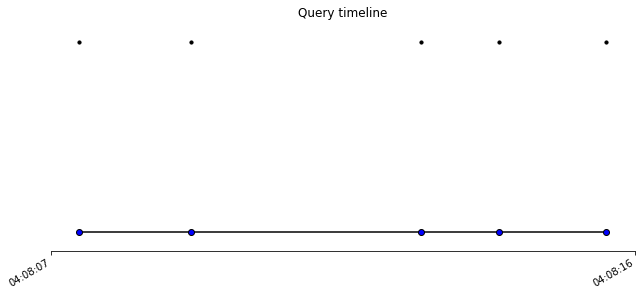

In [34]:

df_miroqueries, df_queries = create_queries_df(boardId)
#print(df_queries.index)
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Query timeline")
levels = df_queries['webpagesVisited']
ax.plot(df_queries.index, np.zeros_like(df_queries.index, dtype='int32'), "-o",color="k", markerfacecolor="b")
ax.scatter(df_miroqueries.index, np.full_like(df_miroqueries.index, 1, dtype='int32'),10,marker="o",color="k")
#ax.vlines(df_queries.index, 0, levels, color="tab:red") 

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.margins(y=0.1)
plt.show()

### Full Timeline Activity

In [35]:
def plot_board_activity(boardId):
    df_miroqueries, df_queries = create_queries_df(boardId)
    df_suggestions = create_suggestions_df(boardId)
    board_df = create_board_df(boardId)
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title="Board Activity timeline for " + boardId + ' (' + boardInfo.filter(items=[boardId], axis=0)['studyType'].iloc[0]+')')
    lines = []
    two_minute = timedelta(minutes=2)
    ax.plot(df_suggestions.index, np.full_like(df_suggestions.index,0, dtype='int32'), "-" ,linestyle='None')
    ax.scatter(df_suggestions.index, np.full_like(df_suggestions.index,1, dtype='int32'), df_suggestions['suggestionCount']*10+15, marker="o",color="w",edgecolors='k', label='Query suggested')
    ax.scatter(df_miroqueries.index, np.full_like(df_miroqueries.index, 3, dtype='int32'), df_miroqueries['webpagesVisited']*10+15,marker="o",color="k",edgecolors='k', label='Query issued from Miro')
    ax.scatter(df_queries.index, np.full_like(df_queries.index, 2, dtype='int32'),df_queries['webpagesVisited']*20+15, marker="o",color="b", edgecolors='k',label='Query issued')
    
    midinterval = pd.DataFrame(board_df['timestamp'])-(pd.DataFrame(board_df['timestamp'])-pd.DataFrame(board_df['timestamp']).shift(1))/2
    board_df.iloc[1:, board_df.columns.get_loc('timestamp')]= midinterval['timestamp'][1:]
    board_df['charactersDiff']= board_df['totalCharacters'].diff()
    #print(board_df)
    for index, item in board_df.iterrows():
        
        if item['addedWidgets']>0 or item['charactersDiff']>=50:
            ax.plot(item['timestamp'], 0, "o",color="g", markeredgecolor='k', label='Note Created on Miro')
        
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(y=0.1)
    
    handles,labels = ax.get_legend_handles_labels()
    handles = [handles[-2], handles[-1], handles[-3], handles[0]]
    labels = [labels[-2], labels[-1], labels[-3], labels[0]]
    ax.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

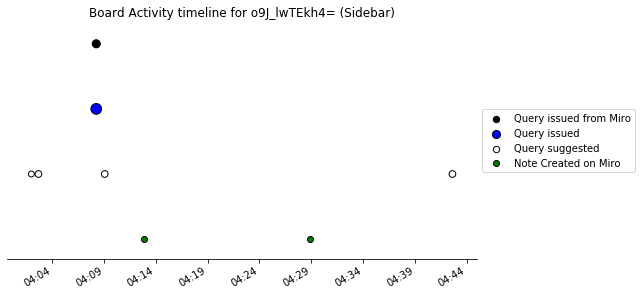

In [36]:
plot_board_activity(boardId)

## Plotting activity for all boards

#### Sidebar Condition

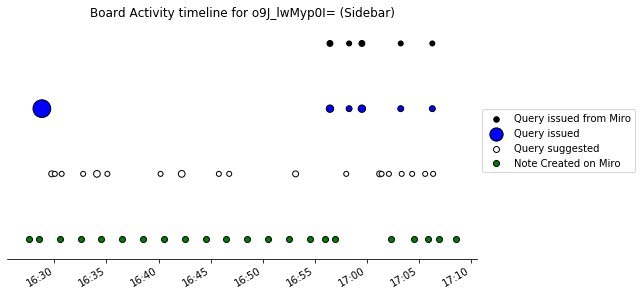

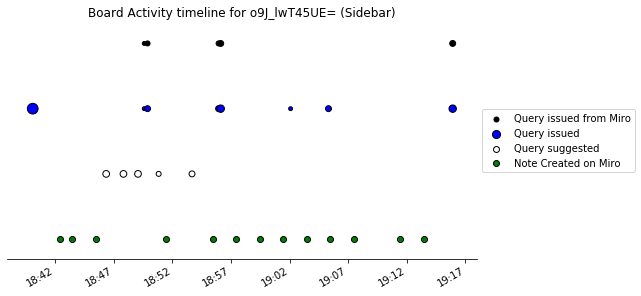

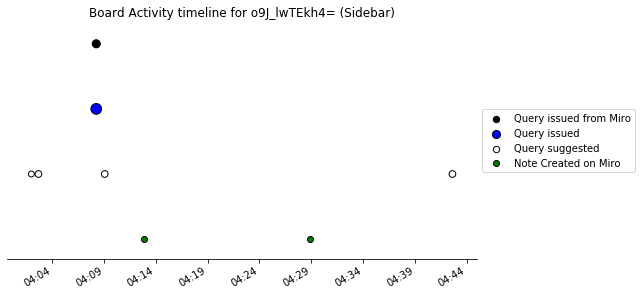

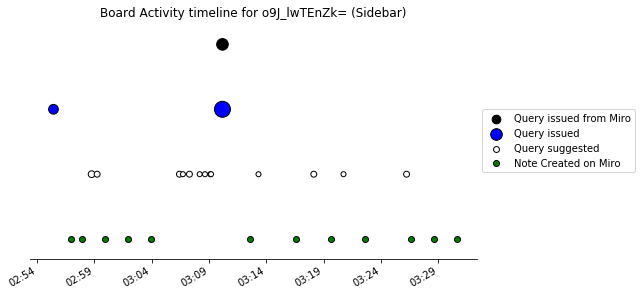

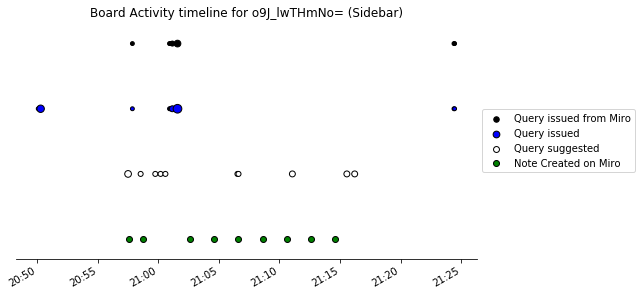

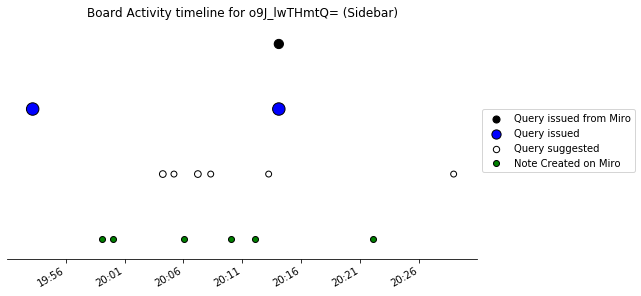

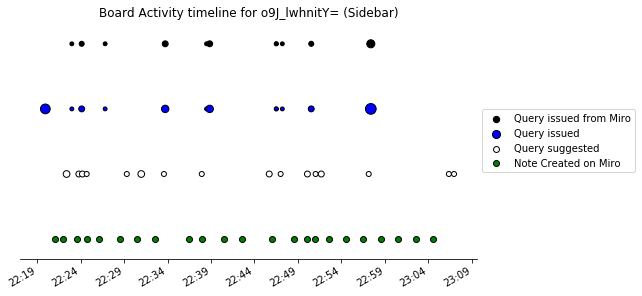

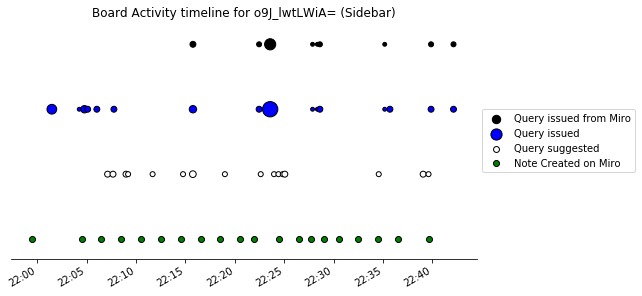

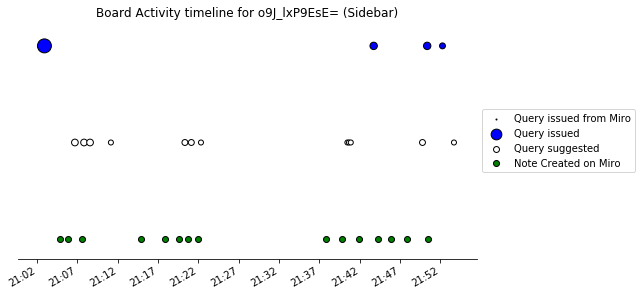

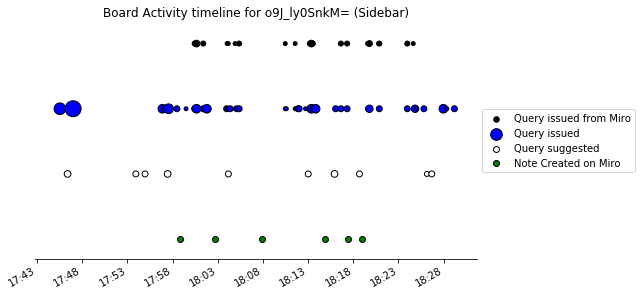

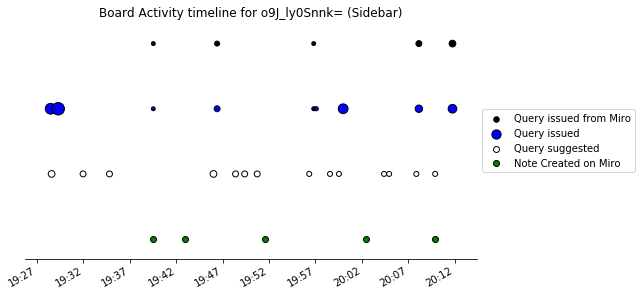

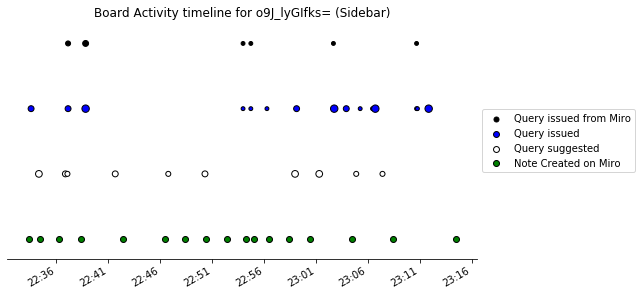

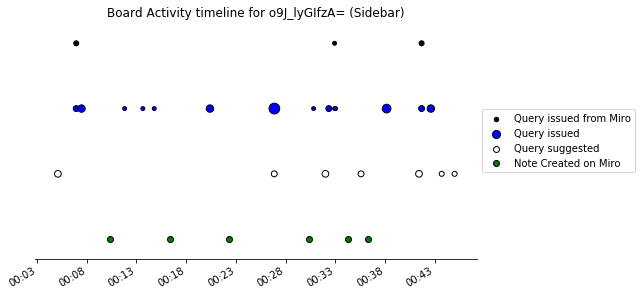

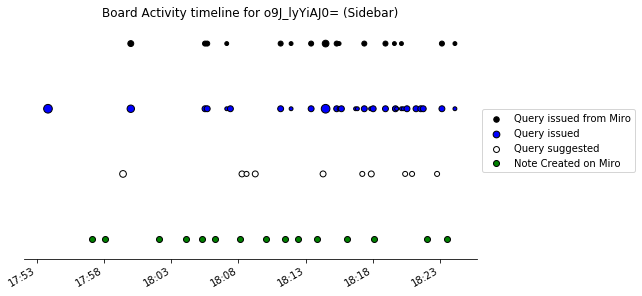

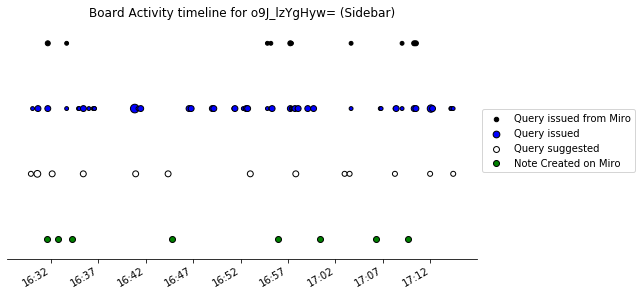

In [37]:
for boardId in sidebarBoards.index.unique():
    plot_board_activity(boardId)

#### On-Board Condition

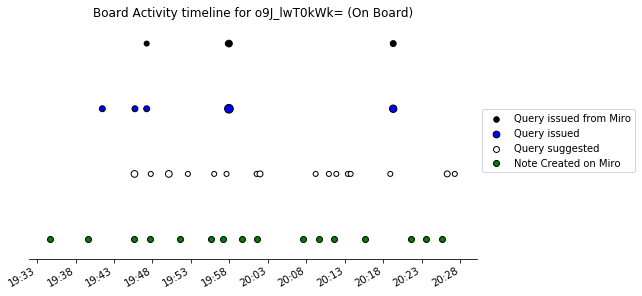

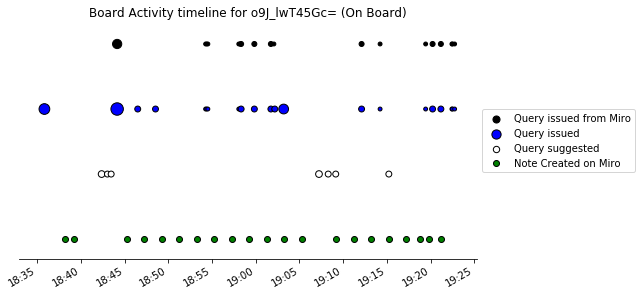

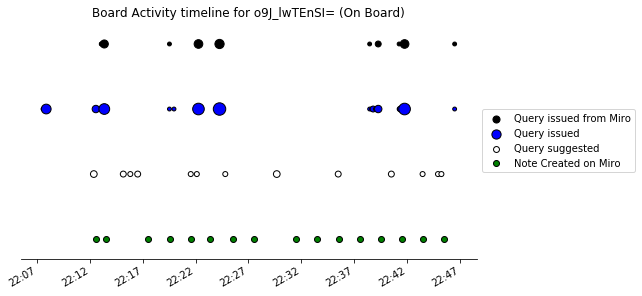

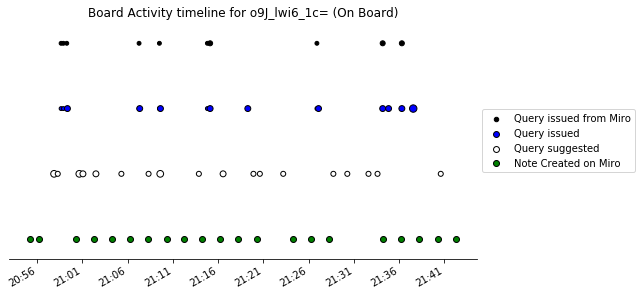

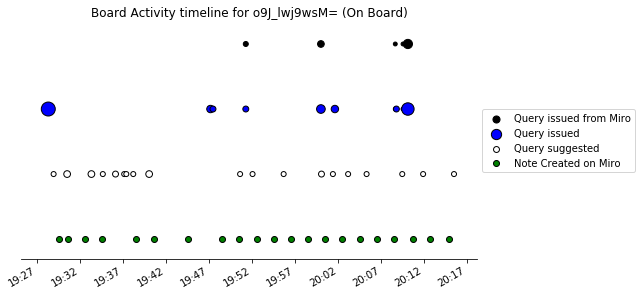

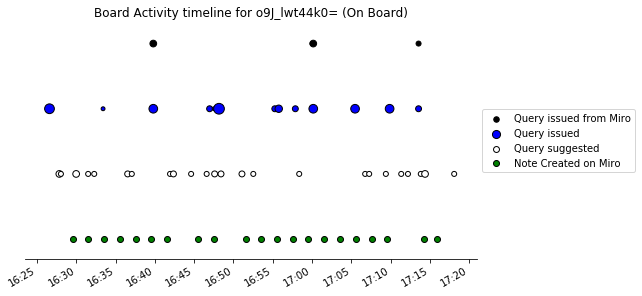

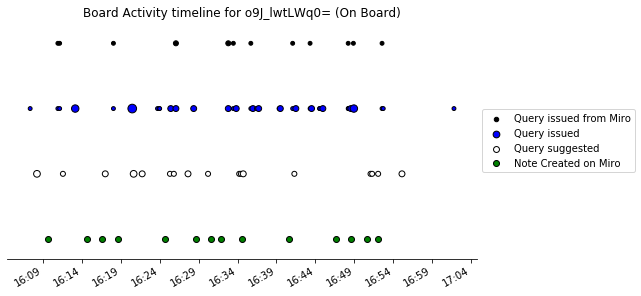

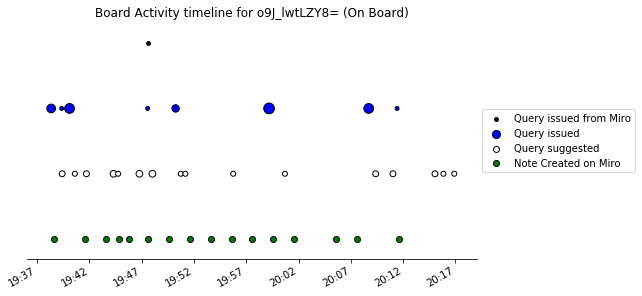

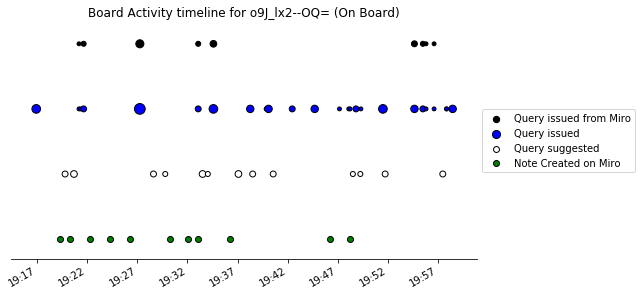

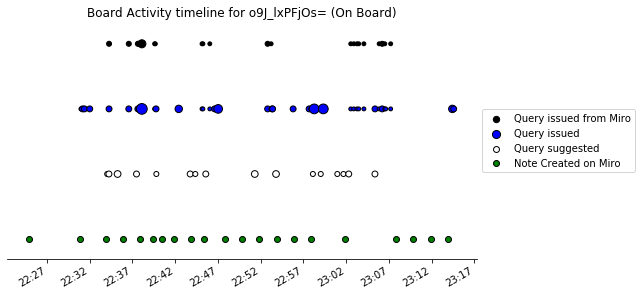

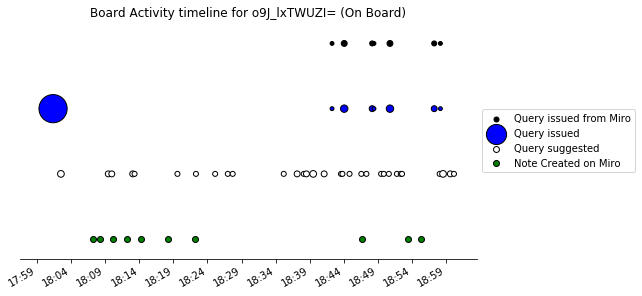

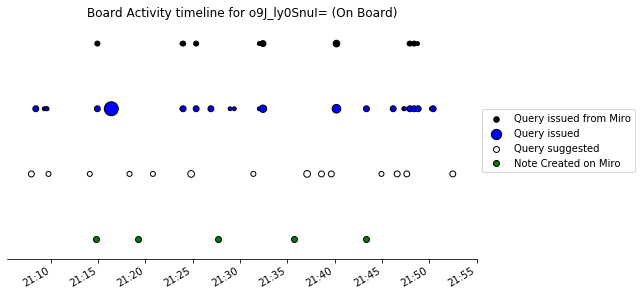

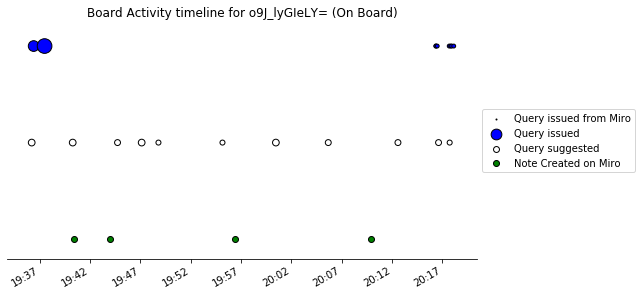

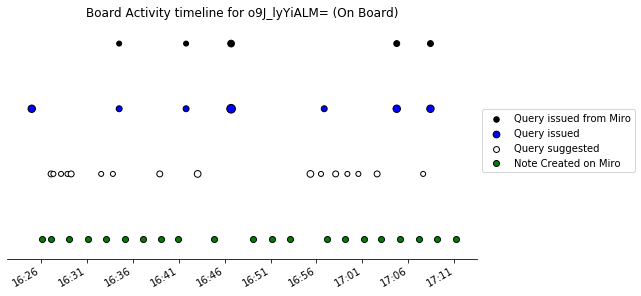

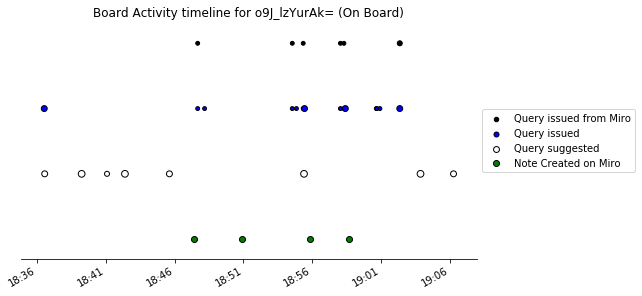

In [38]:
for boardId in onboardBoards.index.unique():
    plot_board_activity(boardId)

## Effect on Sense-making Totals

In [39]:
idx = boardHists.groupby(['boardId'])['timestamp'].transform(max) == boardHists['timestamp']

presentBoards = boardHists[idx]
presentBoards['wordTotal']=0
presentBoards['widgetCount']=0
wordTotals=[]
widgetCounts = []
for row, item in presentBoards.iterrows():
    wordTotal =0
    widgetCount = 0
    for widget in list(eval(item['content'])):
        if widget['createdUserId']in ['3074457360807760467', '3074457358223351101']:
            continue
        text = widget['plainText'] if 'plainText' in widget else ''
        widgetType = widget['metadata'][client_id]['type'] if 'metadata' in widget else widget['type']
        if '🔎︎' in text or '✗' in text:
            continue
        if widget['type']=='LINE':
            continue
        if widgetType not in ['ClusterTitle', 'Cluster']:
            widgetCount+=1
        wordTotal += len(text.split(' '))
    #print(wordTotal)
    wordTotals.append(wordTotal)
    widgetCounts.append(widgetCount)
#     presentBoards.at[key,'wordTotal'] = wordTotal
#     presentBoards.at[key,'widgetCount'] = widgetCount
presentBoards['wordTotal']=wordTotals
presentBoards['widgetCount']=widgetCounts
presentBoards = presentBoards.join(boardInfo, on='boardId')

C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

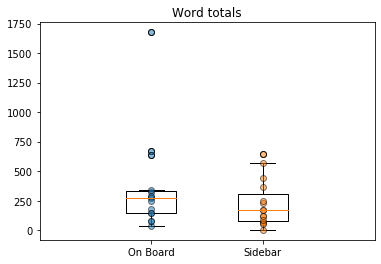

In [40]:
f, ax = plt.subplots()
ax.boxplot(presentBoards[presentBoards['studyType']=='On Board']['wordTotal'],positions=[1/3])
ax.boxplot(presentBoards[presentBoards['studyType']=='Sidebar']['wordTotal'],positions=[2/3])
ax.plot([1/3  for x in range(len(presentBoards[presentBoards['studyType']=='On Board']['wordTotal']))], presentBoards[presentBoards['studyType']=='On Board']['wordTotal'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(presentBoards[presentBoards['studyType']=='Sidebar']['wordTotal']))], presentBoards[presentBoards['studyType']=='Sidebar']['wordTotal'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Word totals')
plt.show()

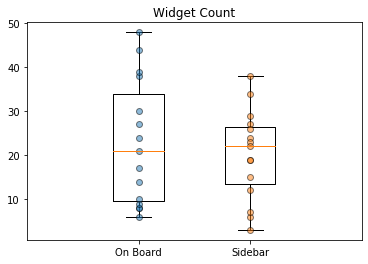

In [41]:
f, ax = plt.subplots()
ax.boxplot(presentBoards[presentBoards['studyType']=='On Board']['widgetCount'],positions=[1/3])
ax.boxplot(presentBoards[presentBoards['studyType']=='Sidebar']['widgetCount'],positions=[2/3])
ax.plot([1/3  for x in range(len(presentBoards[presentBoards['studyType']=='On Board']['widgetCount']))], presentBoards[presentBoards['studyType']=='On Board']['widgetCount'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(presentBoards[presentBoards['studyType']=='Sidebar']['widgetCount']))], presentBoards[presentBoards['studyType']=='Sidebar']['widgetCount'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Widget Count')
plt.show()

## Board activity after user sees a suggestions




In [42]:
suggestionCircleClicked_dict

suggCircleActivity=[]
boardInfo[boardInfo['studyType']=='On Board']
for boardId in boardInfo[boardInfo['studyType']=='On Board'].index:
    if boardId in ['o9J_lyYiALg=','o9J_lwrV0Y8=']:
        continue
    for item in suggestionCircleClicked_dict[boardId].dropna():
        suggCircleActivity.append({"boardId": boardId, "suggOpenedTime": datetime.strptime(item,'%Y-%m-%dT%H:%M:%S.%f')})
    
        

suggActivity = pd.DataFrame(suggCircleActivity).sort_values('suggOpenedTime', axis=0).reset_index(drop=True)
suggActivity['suggIntervalEndTime'] = suggActivity.groupby('boardId')['suggOpenedTime'].shift(-1).fillna(datetime.strptime('2030-01-01T00:00:00.000000','%Y-%m-%dT%H:%M:%S.%f'))
suggActivity['addedWidgets']=0
suggActivity['characterDiff']=0

suggActivity[suggActivity['boardId']=='o9J_lwT45Gc=']

,boardId,suggOpenedTime,suggIntervalEndTime,addedWidgets,characterDiff
222,o9J_lwT45Gc=,2021-09-19 18:44:01.240866,2021-09-19 18:54:10.728839,0,0
223,o9J_lwT45Gc=,2021-09-19 18:54:10.728839,2021-09-19 18:54:18.065129,0,0
224,o9J_lwT45Gc=,2021-09-19 18:54:18.065129,2021-09-19 18:54:26.150228,0,0
225,o9J_lwT45Gc=,2021-09-19 18:54:26.150228,2021-09-19 18:57:56.388663,0,0
226,o9J_lwT45Gc=,2021-09-19 18:57:56.388663,2021-09-19 18:58:05.109626,0,0
227,o9J_lwT45Gc=,2021-09-19 18:58:05.109626,2021-09-19 18:58:13.697926,0,0
228,o9J_lwT45Gc=,2021-09-19 18:58:13.697926,2021-09-19 19:04:05.851793,0,0
229,o9J_lwT45Gc=,2021-09-19 19:04:05.851793,2021-09-19 19:12:01.145443,0,0
230,o9J_lwT45Gc=,2021-09-19 19:12:01.145443,2021-09-19 19:12:13.116410,0,0
231,o9J_lwT45Gc=,2021-09-19 19:12:13.116410,2021-09-19 19:14:06.655686,0,0


In [43]:
webpage_df =pd.read_csv('webpage_df.csv')
for boardId in boardInfo[boardInfo['studyType']=='On Board'].index:
    board_df = create_board_df(boardId)
    board_df['charDiff']=board_df['totalCharacters'].diff()
    webpageboard_df=webpage_df[webpage_df['boardId']==boardId]
    webpageboard_df['timestamp'] = pd.to_datetime(webpageboard_df['timestamp'])
    for key, item in suggActivity[suggActivity['boardId']==boardId].iterrows():
        suggIntervalActivity = board_df[(board_df['timestamp']<item.suggIntervalEndTime) & (board_df['timestamp']>=item.suggOpenedTime)]
        webpageIntervalActivity = webpageboard_df[(webpageboard_df['timestamp']<item.suggIntervalEndTime) & (webpageboard_df['timestamp']>=item.suggOpenedTime)]
        suggActivity.at[key, 'addedWidgets']=suggIntervalActivity['addedWidgets'].sum()
        suggActivity.at[key, 'characterDiff']=suggIntervalActivity['charDiff'].sum()
        suggActivity.at[key, 'webpagesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == False]['isQuery'].count()
        suggActivity.at[key, 'queriesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == True]['isQuery'].count()
suggActivity

C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,boardId,suggOpenedTime,suggIntervalEndTime,addedWidgets,characterDiff,webpagesOpened,queriesOpened
0,o9J_lzYurAk=,2021-09-03 18:47:25.484276,2021-09-03 18:47:28.787963,0,0,0.0,0.0
1,o9J_lzYurAk=,2021-09-03 18:47:28.787963,2021-09-03 18:54:21.235389,9,-30,0.0,2.0
2,o9J_lzYurAk=,2021-09-03 18:54:21.235389,2021-09-03 18:57:21.836655,1,675,1.0,4.0
3,o9J_lzYurAk=,2021-09-03 18:57:21.836655,2021-09-03 18:57:26.867164,0,0,0.0,0.0
4,o9J_lzYurAk=,2021-09-03 18:57:26.867164,2021-09-03 18:57:29.259117,0,0,0.0,0.0
...,...,...,...,...,...,...,...
264,o9J_lwTEnSI=,2021-09-20 22:46:00.905331,2021-09-20 22:46:23.228461,0,0,0.0,0.0
265,o9J_lwTEnSI=,2021-09-20 22:46:23.228461,2021-09-20 22:48:34.065688,2,14,0.0,1.0
266,o9J_lwTEnSI=,2021-09-20 22:48:34.065688,2021-09-20 22:48:36.348464,0,0,0.0,0.0
267,o9J_lwTEnSI=,2021-09-20 22:48:36.348464,2021-09-20 22:48:43.133679,0,0,0.0,0.0


### Mapping widgets to browser queries

In [109]:
widgets_df =pd.read_csv('widgets.csv')
widgets_df['id']= widgets_df['id'].astype('string')
widgets_df

,board_id,id,timestamp,text,bounds,type
0,o9J_lwMyp0I=,3074457364159907248,2021-09-17 16:27:31.153267,Topic Task: Environmental Impacts of Covid-19,"{'bottom': 250, 'height': 500, 'left': -500, '...",Topic
1,o9J_lwMyp0I=,3074457364160615137,2021-09-17 16:27:31.153267,NaN,"{'bottom': 345.8764208547298, 'height': 586.21...",IMAGE
2,o9J_lwMyp0I=,3074457364160615271,2021-09-17 16:27:31.153267,NaN,"{'bottom': 14.5, 'height': 360, 'left': -1208,...",EMBED
3,o9J_lwMyp0I=,3074457364160615306,2021-09-17 16:27:31.153267,NaN,"{'bottom': 388.5, 'height': 360, 'left': -1208...",EMBED
4,o9J_lwMyp0I=,3074457364161306294,2021-09-17 16:27:31.153267,NaN,"{'bottom': 401.40567643147983, 'height': 20, '...",TEXT
...,...,...,...,...,...,...
30373,o9J_lzYurAk=,3074457363437014414,2021-09-09 23:07:35.998728,NaN,"{'bottom': 3497.450131579215, 'height': 3017.3...",Cluster
30374,o9J_lzYurAk=,3074457363436856036,2021-09-09 23:07:35.998728,the way each country is being affected,"{'bottom': 2173.4252340465396, 'height': 85.29...",TEXT
30375,o9J_lzYurAk=,3074457363436855852,2021-09-09 23:07:35.998728,"By 2040 (panel B), both the economic losses an...","{'bottom': 1265.0455774774787, 'height': 459.2...",STICKER
30376,o9J_lzYurAk=,3074457363436856547,2021-09-09 23:07:35.998728,NaN,"{'bottom': 3418.237446835442, 'height': 1244.8...",IMAGE


In [108]:
for boardId in boardInfo.index:
    for key, item in browser_df_joined[(browser_df_joined['boardId']==boardId) & (browser_df_joined['clickedFromMiro']==1)].iterrows():
        relevantSuggestions = suggestion_df_joined[suggestion_df_joined['boardId']==boardId]
        relevantSuggestions=relevantSuggestions[relevantSuggestions['suggestionsQueried']==1]
        relevantSuggestions=relevantSuggestions[relevantSuggestions['status']>=4]
#         if 'Vaccine transportation' not in item.query:
#             continue
#         print(relevantSuggestions)
        for key2, item2 in relevantSuggestions.iterrows():
            if item2.suggestionText not in item.query:
                relevantSuggestions=relevantSuggestions.drop(index=key2)
#         print(relevantSuggestions)
        relevantSuggestions = relevantSuggestions[relevantSuggestions['timestamp']< item.timestamp]
        for key2, item2 in relevantSuggestions.iterrows():
            if item2.status==4 and item2.lastUpdated>item.timestamp:
                relevantSuggestions=relevantSuggestions.drop(index=key2)
#         print(relevantSuggestions)
        if len(relevantSuggestions)>0:
            widgettypes=[]
            relevantSuggestions = relevantSuggestions.sort_values('lastUpdated').iloc[0]
            #print(relevantSuggestions)
            parentWidgetA = widgets_df[widgets_df['id']==relevantSuggestions['parentIdA']]
            parentWidgetA['timestamp'] = pd.to_datetime(parentWidgetA['timestamp'])
            parentWidgetA = parentWidgetA[parentWidgetA['timestamp']<item.timestamp]
#             print(relevantSuggestions['parentIdB'] in widgets_df['id'])
            parentWidgetB=widgets_df[widgets_df['id']==relevantSuggestions['parentIdB']]
#             print(relevantSuggestions['parentIdB'])
            parentWidgetB['timestamp'] = pd.to_datetime(parentWidgetB['timestamp'])
            parentWidgetB = parentWidgetB[parentWidgetB['timestamp']<item.timestamp]
            widgetPosition=None
            if relevantSuggestions['parentIdB']!=0 and len(parentWidgetB)!=0:
                #print('yay')
                parentWidgetB = parentWidgetB.sort_values('timestamp',ascending=False).iloc[0]
                widgettypes.append(parentWidgetB.type)
                bounds2 = eval(parentWidgetB.bounds)
                positionX = (bounds['x']+bounds2['x'])/2
                positionY=(bounds['y']+bounds2['y'])/2
                widgetPosition = {'x':positionX, 'y':positionY}
#                 print(widgetPosition)
                #browser_df_joined.at[key, 'parentWidgetBType']=parentWidgetB.type
                #browser_df_joined.at[key, 'parentWidgetBBounds']=parentWidgetB.bounds
            if len(parentWidgetA)!=0:
                parentWidgetA=parentWidgetA.sort_values('timestamp',ascending=False).iloc[0]
                widgettypes.append(parentWidgetA.type)
                bounds = eval(parentWidgetA.bounds)
                #print(bounds)
                if widgetPosition is None:
                    widgetPosition = {'x': bounds['x'], 'y':bounds['y']}
                
#                 print(type(bounds['x']))
#                 print(type(widgetPosition))
#                 print(str(widgetPosition))
                
                browser_df_joined.at[key, 'parentWidgetTypes']=widgettypes
                browser_df_joined.at[key, 'positionX']=widgetPosition['x']
                browser_df_joined.at[key, 'positionY']=widgetPosition['y']
                #browser_df_joined.at[key, 'parentWidgetAType']=parentWidgetA.type
                #browser_df_joined.at[key, 'parentWidgetABounds']=parentWidgetA.bounds
            
#         else:
#             print(item['addedWidgets'])
       
browser_df_joined
        


C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,parentWidgetTypes,positionX,positionY,timeIntervalEnd,addedWidgets,characterDiff,totalDistance,webpagesOpened
0,o9J_lwMyp0I=,2021-09-17 16:28:47.910522,environmental impact of covid 19,"['""environmental impact of covid 19 pandemic""'...",['What are some long term effects of COVID-19?...,['positive and negative impact of covid-19 on ...,15,0,Sidebar,COVID-19,NaN,NaN,NaN,2021-09-17 16:56:27.546971,30,4311,NaN,15.0
1,o9J_lwMyp0I=,2021-09-17 16:56:27.546971,Environmental racism Environmental Impacts of ...,[''],NaN,"['Environmental racism policies', 'Environment...",2,1,Sidebar,COVID-19,[TEXT],602.688420,1206.287100,2021-09-17 16:58:17.872410,1,48,185.501740,2.0
2,o9J_lwMyp0I=,2021-09-17 16:58:17.872410,Post-covid Green Recovery Environmental Impact...,[''],['How has the COVID-19 pandemic impacted the e...,"['Post COVID green recovery plan', 'What does ...",1,1,Sidebar,COVID-19,[TEXT],116.132019,1941.636734,2021-09-17 16:59:31.474193,0,0,NaN,1.0
3,o9J_lwMyp0I=,2021-09-17 16:59:31.474193,Waste management policies Environmental Impact...,[''],['How has the COVID-19 pandemic impacted the e...,['impact of covid-19 on solid waste management...,2,1,Sidebar,COVID-19,[TEXT],445.569729,599.788924,2021-09-17 17:03:15.252394,1,228,1366.241197,2.0
4,o9J_lwMyp0I=,2021-09-17 17:03:15.252394,Vaccine transportation Environmental Impacts o...,[''],['How has the COVID-19 pandemic impacted the e...,"['environmental impact of covid-19 2021', 'Env...",1,1,Sidebar,COVID-19,[Topic],0.000000,0.000000,2021-09-17 17:06:17.310254,1,308,1208.252304,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,o9J_lzYurAk=,2021-09-03 18:58:24.475979,Recycling Programs covid 19,[''],NaN,"['Recycling during COVID', 'Cardboard recyclin...",1,0,On Board,COVID-19,NaN,NaN,NaN,2021-09-03 19:00:39.513688,1,175,NaN,1.0
528,o9J_lzYurAk=,2021-09-03 19:00:39.513688,covid 19 and waste,"['""covid 19 and waste management""', '""covid 19...",['How has the COVID-19 pandemic impacted the e...,"['Role of plastic during COVID-19', 'COVID-19 ...",0,0,On Board,COVID-19,NaN,NaN,NaN,2021-09-03 19:00:42.203490,0,0,NaN,0.0
529,o9J_lzYurAk=,2021-09-03 19:00:42.203490,covid 19 and waste,"['""covid 19 and waste management""', '""covid 19...",NaN,NaN,0,0,On Board,COVID-19,NaN,NaN,NaN,2021-09-03 19:00:55.377616,0,0,NaN,0.0
530,o9J_lzYurAk=,2021-09-03 19:00:55.377616,covid 19 and waste,"['""covid 19 and waste management""', '""covid 19...",NaN,NaN,0,0,On Board,COVID-19,NaN,NaN,NaN,2021-09-03 19:02:21.974397,0,0,NaN,0.0


## Board activity after user opens a suggestions

In [106]:
browser_df_joined['timeIntervalEnd'] = browser_df_joined.groupby('boardId')['timestamp'].shift(-1).fillna(datetime.strptime('2030-01-01T00:00:00.000000','%Y-%m-%dT%H:%M:%S.%f'))
browser_df_joined['addedWidgets']=0
browser_df_joined['characterDiff']=0
for boardId in boardInfo.index:
    board_df = create_board_df(boardId)
    board_df['charDiff']=board_df['totalCharacters'].diff()
    #print(board_df)
    webpageboard_df=webpage_df[webpage_df['boardId']==boardId]
    webpageboard_df['timestamp'] = pd.to_datetime(webpageboard_df['timestamp'])
    for key, item in browser_df_joined[browser_df_joined['boardId']==boardId].iterrows():
        suggIntervalActivity = board_df[(board_df['timestamp']<item.timeIntervalEnd) & (board_df['timestamp']>=item.timestamp)]
        webpageIntervalActivity = webpageboard_df[(webpageboard_df['timestamp']<item.timeIntervalEnd) & (webpageboard_df['timestamp']>=item.timestamp)]
        positionX = item['positionX']
        positionY = item['positionY']
        totalDistance=None
        if item['clickedFromMiro']==1 and item['addedWidgets']==0:
            totalDistance=0
            for bounds in suggIntervalActivity['bounds']:
                for bound in bounds:
                    totalDistance +=math.sqrt((positionX-bound['x'])**2 + (positionY-bound['y'])**2)
        browser_df_joined.at[key, 'totalDistance'] = None if totalDistance==0 else totalDistance
        browser_df_joined.at[key, 'addedWidgets']=suggIntervalActivity['addedWidgets'].sum()
        browser_df_joined.at[key, 'characterDiff']=suggIntervalActivity['charDiff'].sum()
        browser_df_joined.at[key, 'webpagesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == False]['isQuery'].count()
browser_df_joined#[browser_df_joined['parentWidgetTypes'].notna()]

C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,parentWidgetTypes,positionX,positionY,timeIntervalEnd,addedWidgets,characterDiff,totalDistance,webpagesOpened
1,o9J_lwMyp0I=,2021-09-17 16:56:27.546971,Environmental racism Environmental Impacts of ...,[''],NaN,"['Environmental racism policies', 'Environment...",2,1,Sidebar,COVID-19,TEXT,602.688420,1206.287100,2021-09-17 16:58:17.872410,1,48,185.501740,2.0
2,o9J_lwMyp0I=,2021-09-17 16:58:17.872410,Post-covid Green Recovery Environmental Impact...,[''],['How has the COVID-19 pandemic impacted the e...,"['Post COVID green recovery plan', 'What does ...",1,1,Sidebar,COVID-19,[TEXT],116.132019,1941.636734,2021-09-17 16:59:31.474193,0,0,NaN,1.0
3,o9J_lwMyp0I=,2021-09-17 16:59:31.474193,Waste management policies Environmental Impact...,[''],['How has the COVID-19 pandemic impacted the e...,['impact of covid-19 on solid waste management...,2,1,Sidebar,COVID-19,[TEXT],445.569729,599.788924,2021-09-17 17:03:15.252394,1,228,1366.241197,2.0
4,o9J_lwMyp0I=,2021-09-17 17:03:15.252394,Vaccine transportation Environmental Impacts o...,[''],['How has the COVID-19 pandemic impacted the e...,"['environmental impact of covid-19 2021', 'Env...",1,1,Sidebar,COVID-19,[Topic],0.000000,0.000000,2021-09-17 17:06:17.310254,1,308,1208.252304,1.0
5,o9J_lwMyp0I=,2021-09-17 17:06:17.310254,Business Act on Climate Pledge Environmental I...,[''],NaN,['what is the u.s. doing to combat climate cha...,1,1,Sidebar,COVID-19,[TEXT],90.979743,2232.068024,2030-01-01 00:00:00.000000,1,456,186.958551,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,o9J_lzYurAk=,2021-09-03 18:54:33.114790,Air pollution,"['""air pollution control district""', '""air pol...","['What are main causes of air pollution?', 'Wh...","['Air pollution causes', 'Effects of air pollu...",0,1,On Board,COVID-19,"[TEXT, TEXT]",965.883288,614.421503,2021-09-03 18:54:51.209324,0,0,NaN,0.0
523,o9J_lzYurAk=,2021-09-03 18:55:20.751356,Plastic pollution,"['""plastic pollution in the ocean""', '""plastic...","['What are the effects of plastic pollution?',...","['Plastic pollution facts', 'Plastic pollution...",0,1,On Board,COVID-19,"[TEXT, TEXT]",934.343136,757.279839,2021-09-03 18:55:26.500804,0,0,NaN,0.0
525,o9J_lzYurAk=,2021-09-03 18:58:03.162211,Municipal solid waste ENVIRONMENT,"['""municipal solid waste environmental impact""...",['How does municipal solid waste affect the en...,"['Municipal solid waste examples', 'Municipal ...",0,1,On Board,COVID-19,[ClusterTitle],2039.732004,428.522487,2021-09-03 18:58:18.340120,0,0,NaN,0.0
526,o9J_lzYurAk=,2021-09-03 18:58:18.340120,Recycling Programs ENVIRONMENT,"['""recycling for the environment""']",['How do recycling programs help the environme...,"['Is recycling good for the environment', 'Eco...",0,1,On Board,COVID-19,[ClusterTitle],2039.732004,428.522487,2021-09-03 18:58:24.475979,0,0,NaN,0.0


### Positions of widgets after querying suggestions

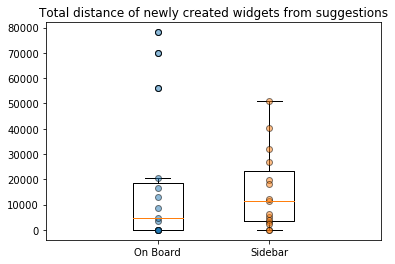

In [63]:
f, ax = plt.subplots()
ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum(),positions=[1/3])
ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum(),positions=[2/3])
ax.plot([1/3  for x in range(len(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum()))], browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum()))], browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Total distance of newly created widgets from suggestions')
plt.show()

### Types of widgets added after querying suggestions

In [136]:
addedWidgets=pd.DataFrame()
for boardId in boardInfo.index:
    widgets=[]
    board_df = create_board_df(boardId)
    for widgetTypes in board_df['widgetTypes']:
        for widgetType in widgetTypes:
            addedWidgets=addedWidgets.append({'boardId': boardId, 'widgetType': widgetType}, ignore_index=True)
addedWidgets['count']=1

addedWidgets = addedWidgets.join(boardInfo, on='boardId',how='inner')
addedWidgetsTypes = pd.pivot_table(addedWidgets, values='count', index=['studyType'], columns='widgetType', aggfunc='sum', fill_value=0)

            
            

# f, ax = plt.subplots()
# ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum(),positions=[1/3])
# ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum(),positions=[2/3])
# ax.plot([1/3  for x in range(len(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum()))], browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum(), 'o', markeredgecolor='k', alpha=0.5)
# ax.plot([2/3 for x in range(len(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum()))], browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum(), 'o', markeredgecolor='k', alpha=0.5)
# plt.xlim([0, 1])
# ax.set_xticks([1/3, 2/3])
# ax.set_xticklabels(['On Board', 'Sidebar'])
# ax.set_title('Total distance of newly created widgets from suggestions')
# plt.show()

In [139]:
addedWidgetsTypes

widgetType,CARD,Cluster,ClusterTitle,DOCUMENT,EMBED,IMAGE,LINE,PREVIEW,SHAPE,STICKER,TEXT,WEBSCREEN
studyType,,,,,,,,,,,,
On Board,0,93,48,3,1,26,67,5,6,111,215,0
Sidebar,3,40,24,0,2,30,69,4,30,18,235,1


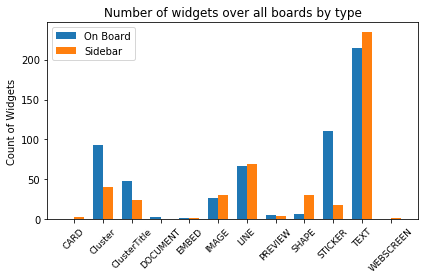

In [173]:
fig, ax = plt.subplots()
x = np.arange(len(addedWidgetsTypes.columns)) 
width = 0.35
addedWidgetsTypesList = addedWidgetsTypes.values.tolist()
rects1 = ax.bar(x - width/2, addedWidgetsTypesList[0], width, label='On Board')
rects2 = ax.bar(x + width/2, addedWidgetsTypesList[1], width, label='Sidebar')
ax.set_ylabel('Count of Widgets')
ax.set_title('Number of widgets over all boards by type')
ax.set_xticks(x)
ax.set_xticklabels(addedWidgetsTypes.columns, rotation=45, size=9)
ax.legend()

fig.tight_layout()
plt.show()